# **`Project 3: Team John Hicks`**

## **Mali** File

### **Objective**: Compare the nutritional intake and food intake in Uganda vs. the US before, during, and after the pandemic.

#### Group Members:
> Leona Katibah <br>
> Jack Pollard <br>
> Jakob Mackanych <br>
> Xi Wang <br>
> Wendy Peng <br>
> Sury Dongre
test


# Project Setup

In [87]:
#import all packages here
#%%capture install_log
!pip install -r requirements.txt

In [88]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

In [89]:
uganda_data = '1yFWlP5N7Aowaj6t2roRSFFUC50aFD-RLBGfzGtqLl0w'
#uganda_data = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'


# **[A] Choice of a Population -  with supporting expenditure data**

- **Population chosen:** Households in **Mali** and in USA - but this document focuses only on the Mali data to maintain clarity across datasets.

- **Time periods:** Using data from **2014–15** (pre-COVID) and **2021–22** (post-COVID)
- **Reason for choice:** To explore how the COVID-19 pandemic impacted *food demand and consumption patterns*
- **Data available:** Detailed household-level data on *food expenditures, prices, and demographics*



### Function to Dynamically Select a **Year** (2013–14 or 2019–20) and get expenditure data


In [94]:
def process_data_per_year(uganda_data, year):
    """
    Processes the Uganda dataset for a given year.
    
    Parameters:
      uganda_data: The key or identifier for your Sheets data.
      year: The time period to filter by (e.g., "2013-14").
    
    Returns:
      x: DataFrame of processed food expenditures.
      p: DataFrame of processed food prices (only for goods with expenditures).
      y: DataFrame of the log of expenditures.
      d: DataFrame of household characteristics for the selected year.
    """
    # --- Food Expenditures ---
    sheet_expend = f"Food Expenditures ({year})"
    x = read_sheets(uganda_data, sheet=sheet_expend)
    x = x.set_index(['i', 't', 'm', 'j']).squeeze()
    
    # --- Food Prices ---
    sheet_prices = f"Food Prices ({year})"
    p = read_sheets(uganda_data, sheet=sheet_prices).set_index(['t', 'm', 'j', 'u'])
    p = p.groupby(['t', 'm', 'j', 'u']).median()
    
    # Inspect available unit values
    available_units = p.index.get_level_values('u').unique()
    #print("Available unit values:", available_units)
    
    # Try to select prices with unit 'kg'
    try:
        p = p.xs('Kg', level="u").squeeze().unstack('j')
    except KeyError:
        # If 'kg' is not available, either adjust the unit or handle it differently:
        raise KeyError(f"'kg' not found in unit levels. Available units: {available_units}")
    
    p = p[x.index.levels[-1]].T

    # --- Household Characteristics ---
    d = read_sheets(uganda_data, sheet="Household Characteristics")
    d = d[d.t == year]
    d.columns.name = 'k'
    d = d.replace(np.nan, 0)
    
    # --- Expenditures Processing ---
    x = x.T.groupby(['i', 't', 'm', 'j']).sum()
    x = x.replace(0, np.nan)
    y = np.log(x)
    
    # --- Set index for household characteristics ---
    d.set_index(['i', 't', 'm'], inplace=True)
    
    return x, y, d

# --------------------------------------------
# CHANGE YEAR (2013-14 or 2019-20) and Run Cell
#---------------------------------------------
x, y, d = process_data_per_year(uganda_data,"2019-20")

print("Food Expenditures (x)")
display(x.head())

print("Household Characteristics (d)")
display(d.head())

print("Log of Expenditures (y)")
display(y.head())

Food Expenditures (x)


i                                 t        m         j              
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Beans (dry)        12000
                                                     Beef               28000
                                                     Beer                9600
                                                     Cabbage (green)     1000
                                                     Cassava (fresh)     4000
Name: Expenditure, dtype: int64

Household Characteristics (d)


,,k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.609438
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.098612
00246782f8654441a9df0f6ec0b6fc9f,2019-20,Northern,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.791759
003ed8d32f794609919d60d2ed8813e8,2019-20,Eastern,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.386294
005fbc5779014a0290b088071bde9f72,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Log of Expenditures (y)


i                                 t        m         j              
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Beans (dry)         9.392662
                                                     Beef               10.239960
                                                     Beer                9.169518
                                                     Cabbage (green)     6.907755
                                                     Cassava (fresh)     8.294050
Name: Expenditure, dtype: float64

# **[B] Nutritional content of differnet foods**

### Select a **Year** (2013–14 or 2019–20) and clean DFs

In [95]:
import cfe

# Define your InputFiles dictionary.
InputFiles = {
    'Expenditures': ('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','Expenditures (2019-20)'), #CHANGE YEAR HERE 2013-14 OR 2019-20
    'Prices': ('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','Prices'),
    'HH Characteristics': ('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','HH Characteristics'),
    'FCT': ('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','FCT'),
    'RDI': ('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','RDI'),
}



def get_clean_sheet(key, sheet=None):
    """
    Read a sheet from Google Sheets, clean column names and duplicates.
    """
    df = read_sheets(key, sheet=sheet)
    # Strip whitespace from column names.
    df.columns = [c.strip() for c in df.columns.tolist()]
    # Remove duplicate columns, keeping the first occurrence.
    df = df.loc[:, ~df.columns.duplicated(keep='first')]
    # Drop columns that start with 'Unnamed'
    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)
    # Drop duplicate rows based on the index.
    df = df.loc[~df.index.duplicated(), :]
    # Also drop any completely duplicate rows.
    df = df.drop_duplicates()
    return df


def load_data(InputFiles):
    """
    Load and preprocess the Expenditures, HH Characteristics, Prices, FCT, and RDI data.
    Returns:
      x: Expenditures DataFrame indexed by ['i','t','m'] with columns 'j'
      z: Household characteristics DataFrame indexed by ['i','t','m']
      p, fct, rdi: Other data sets (if needed for later analysis)
    """
    # Get expenditures
    x = get_clean_sheet(InputFiles['Expenditures'][0],
                        sheet=InputFiles['Expenditures'][1])
    if 'm' not in x.columns:
        x['m'] = 1
    x = x.set_index(['i','t','m'])
    x.columns.name = 'j'
    x = x.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    x = x.replace(0, np.nan)
    
    # Get HH Characteristics
    z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                        sheet=InputFiles['HH Characteristics'][1])
    if 'm' not in z.columns:
        z['m'] = 1
    z = z.set_index(['i','t','m'])
    z.columns.name = 'k'
    z = z.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    
    # Get Prices (if needed later)
    p = get_clean_sheet(InputFiles['Prices'][0],
                        sheet=InputFiles['Prices'][1])
    if 'm' not in p.columns:
        p['m'] = 1
    p = p.set_index(['t','m'])
    p.columns.name = 'j'
    p = p.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    p = p.replace(0, np.nan)
    
    # Get FCT
    fct = get_clean_sheet(InputFiles['FCT'][0],
                          sheet=InputFiles['FCT'][1])
    fct = fct.set_index('j')
    fct.columns.name = 'n'
    fct = fct.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    
    # Get RDI
    rdi = get_clean_sheet(InputFiles['RDI'][0],
                          sheet=InputFiles['RDI'][1])
    rdi = rdi.set_index('n')
    rdi.columns.name = 'k'
    
    return x, z, p, fct, rdi


def prepare_expenditures_for_regression(x):
    """
    Convert the Expenditures DataFrame to a 1D Series (y) for regression.
    This function aggregates duplicate (i,t,m,j) combinations using the mean,
    then takes the natural log.
    """
    # Stack the expenditures so that columns (j) become part of the index.
    # Reset index to make all index levels into columns.
    df_long = x.stack().reset_index(name='expenditure')
    # Now, if duplicates exist in (i,t,m,j), aggregate them.
    df_agg = df_long.groupby(['i', 't', 'm', 'j'])['expenditure'].mean().reset_index()
    # Set the multi-index again.
    y = df_agg.set_index(['i', 't', 'm', 'j'])['expenditure']
    # Take the log of expenditures.
    y_log = np.log(y)
    return y_log


def run_regression(x, z):
    """
    Prepare the data and run the regression of log(expenditures) on household characteristics.
    Returns the regression result from cfe.
    """
    # Prepare y (dependent variable)
    y_log = prepare_expenditures_for_regression(x)
    
    # Run the regression.
    result = cfe.Regression(y=y_log, d=z)
    return result


# =============================================================================
# Example of using the functions:
# =============================================================================

# Load all data.
x, z, p, fct, rdi = load_data(InputFiles)

# Optionally, you can check a preview of your data:
display(x.head())
display(z.head())
display(p.head())
display(fct.head())
display(rdi.head())

print("Shape of x (Expenditures):", x.shape)
print("Shape of z (HH Characteristics):", z.shape)
print("Shape of p (Prices):", p.shape)
print("Shape of fct (Food Composition Table):", fct.shape)
print("Shape of rdi (Recommended Daily Intake):", rdi.shape)

# Run the regression.
result = run_regression(x, z)

# Display sorted regression coefficients.
beta_sorted = result.get_beta().sort_values(ascending=False)
print(beta_sorted.head(20))


,,j,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",Cabbages,Cake,Cassava,...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
i,t,m,,,,,,,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,1400.0,NaN,6000.0,...,NaN,NaN,4000.0,200.0,1000.0,NaN,NaN,NaN,3000.0,NaN
062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1000.0,4500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,...,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200.0,...,NaN,NaN,5000.0,200.0,500.0,NaN,NaN,NaN,NaN,NaN
1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN


k                                                 F 00-03  F 04-08  F 09-13  \
i                                t       m                                    
00c9353d8ebe42faabf5919b81d7fae7 2018-19              1.0      0.0      1.0   
                                 2019-20 Eastern      1.0      0.0      0.0   
02dd448165ce46279ca601a02865d543 2018-19              0.0      0.0      0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19              0.0      1.0      0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19              0.0      1.0      1.0   

k                                                 F 14-18  F 19-30  F 31-50  \
i                                t       m                                    
00c9353d8ebe42faabf5919b81d7fae7 2018-19              3.0      1.0      0.0   
                                 2019-20 Eastern      3.0      1.0      0.0   
02dd448165ce46279ca601a02865d543 2018-19              0.0      1.0      0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19              0.0      0.0      1.0   
039a11571b874a88b7a6c200469fe4f3 2018-19              0.0      0.0      1.0   

k                                                 F 51+  M 00-03  M 04-08  \
i                                t       m                                  
00c9353d8ebe42faabf5919b81d7fae7 2018-19            1.0      0.0      0.0   
                                 2019-20 Eastern    1.0      0.0      0.0   
02dd448165ce46279ca601a02865d543 2018-19            0.0      0.0      0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19            0.0      0.0      2.0   
039a11571b874a88b7a6c200469fe4f3 2018-19            0.0      0.0      0.0   

k                                                 M 09-13  M 14-18  M 19-30  \
i                                t       m                                    
00c9353d8ebe42faabf5919b81d7fae7 2018-19              1.0      0.0      0.0   
                                 2019-20 Eastern      1.0      0.0      0.0   
02dd448165ce46279ca601a02865d543 2018-19              0.0      0.0      0.0   
037866653c7c4cb99a80f05a38cdafb2 2018-19              0.0      0.0      0.0   
039a11571b874a88b7a6c200469fe4f3 2018-19              1.0      0.0      0.0   

k                                                 M 31-50  M 51+  log HSize  
i                                t       m                                   
00c9353d8ebe42faabf5919b81d7fae7 2018-19              0.0    0.0   2.079442  
                                 2019-20 Eastern      0.0    0.0   1.945910  
02dd448165ce46279ca601a02865d543 2018-19              0.0    0.0   0.000000  
037866653c7c4cb99a80f05a38cdafb2 2018-19              0.0    1.0   1.609438  
039a11571b874a88b7a6c200469fe4f3 2018-19              1.0    0.0   1.609438

j                       Beans  Beef    Beer  Biscuits  Bongo   Bread  \
t       m                                                              
2005-06 Central    650.000000  2500  3000.0       NaN    NaN  1400.0   
2005-6  Eastern    550.000000  2400  2000.0       NaN    NaN  1000.0   
        Northern   434.151414  2500  2400.0       NaN    NaN  1000.0   
        Western    500.000000  2200  2500.0       NaN    NaN  1000.0   
2009-10 Central   1350.000000  5000  4000.0       NaN    NaN  2400.0   

j                 Butter, etc.  Cabbages  Cake  Cassava  ...  Sugarcane  \
t       m                                                ...              
2005-06 Central         3000.0    1400.0   NaN    500.0  ...        NaN   
2005-6  Eastern         3300.0    1050.0   NaN    500.0  ...        NaN   
        Northern        1500.0    1225.0   NaN    300.0  ...        NaN   
        Western         3000.0    1050.0   NaN    500.0  ...        NaN   
2009-10 Central         4800.0    1750.0   NaN   1000.0  ...        NaN   

j                 Sweet Bananas  Sweet Potatoes     Tea  Tomatoes  Waragi  \
t       m                                                                   
2005-06 Central       54.054054           750.0   800.0     100.0     NaN   
2005-6  Eastern       40.000000           200.0   800.0     100.0     NaN   
        Northern      43.243243           200.0   800.0     100.0     NaN   
        Western       41.621622           200.0  1000.0     200.0     NaN   
2009-10 Central      108.108108          1000.0   800.0     300.0     NaN   

j                 Water  Wheat (flour)  Yam  Yogurt  
t       m                                            
2005-06 Central     NaN            NaN  NaN     NaN  
2005-6  Eastern     NaN            NaN  NaN     NaN  
        Northern    NaN            NaN  NaN     NaN  
        Western     NaN            NaN  NaN     NaN  
2009-10 Central     NaN            NaN  NaN     NaN  

[5 rows x 74 columns]

n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
j,,,,,,,,,,,,,,,
Avocado,1600,20.0,70.0,810,120,85.0,6.0,17.38,1.30,0.67,70,0.0,2.57,100,6.0
Beans (dry),1700,98.0,60.0,500,580,325.0,30.0,7.00,1.20,3.40,0,0.0,2.15,10,8.0
Beans (fresh),3470,214.0,160.0,5250,1130,626.0,51.0,11.74,2.12,7.13,0,0.0,4.74,63,23.0
Beef,2510,182.0,0.0,60,70,0.0,19.0,31.50,1.60,0.90,0,28.9,3.80,0,37.0
Beef (roasted),2910,264.0,0.0,70,90,0.0,27.0,37.20,2.20,0.90,0,24.7,3.40,0,60.0


k,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


Shape of x (Expenditures): (3009, 74)
Shape of z (HH Characteristics): (24363, 15)
Shape of p (Prices): (32, 74)
Shape of fct (Food Composition Table): (103, 15)
Shape of rdi (Recommended Daily Intake): (20, 14)
j
Fish (fresh)     0.856317
Biscuits         0.842007
Milk (fresh)     0.773909
Other Fruits     0.700210
Oranges          0.692816
Bread            0.670513
Chapati          0.658287
Soda             0.649659
Sweet Bananas    0.611643
Other Veg.       0.583444
Kabalagala       0.576369
Sim Sim          0.565896
Mangos           0.536732
Rice             0.503046
Yam              0.494819
Tomatoes         0.468841
Pork             0.459771
Ground Nuts      0.445470
Beef             0.425689
Cooking Oil      0.425479
Name: beta, dtype: float64


In [96]:
result.to_pickle('./foo.pickle')

In [97]:
import cfe

result = cfe.read_pickle('foo.pickle')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [98]:
use = fct.index.intersection(qhat.columns)


nutrients = qhat[use]@fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household. (Depends on dataset)

n
Energy          56739.661823
Protein          1339.483420
Fiber             698.438550
Folate          11434.576050
Calcium         17510.481438
Carbohydrate     7408.343835
Iron              362.589737
Niacin            397.056017
Riboflavin         36.723462
Thiamin            45.216364
Vitamin A       14298.448468
Vitamin B-12       59.830240
Vitamin B-6        66.908054
Vitamin C        6441.226891
Zinc              215.284883
dtype: float64

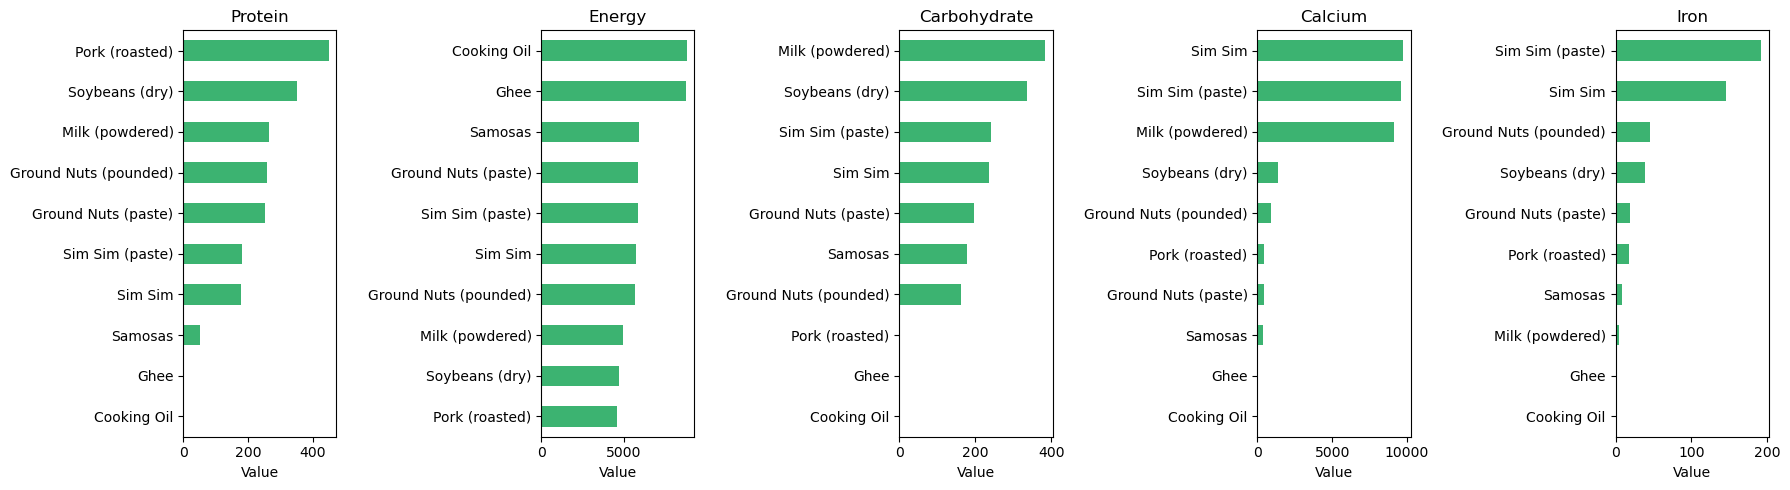

In [99]:
import matplotlib.pyplot as plt

# Select your nutrients
selected_nutrients = ["Protein", "Energy", "Carbohydrate", "Calcium", "Iron"]
fct_subset = fct[selected_nutrients]

# Get the top 10 foods by Energy as reference (you could also use Protein or average)
top_foods = fct_subset["Energy"].sort_values(ascending=False).head(10).index
fct_top = fct_subset.loc[top_foods]

# Plot bar charts
fig, axes = plt.subplots(nrows=1, ncols=len(fct_top.columns), figsize=(18, 5))

for ax, nutrient in zip(axes, fct_top.columns):
    fct_top[nutrient].sort_values().plot.barh(ax=ax, color='mediumseagreen')
    ax.set_title(nutrient)
    ax.set_xlabel("Value")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


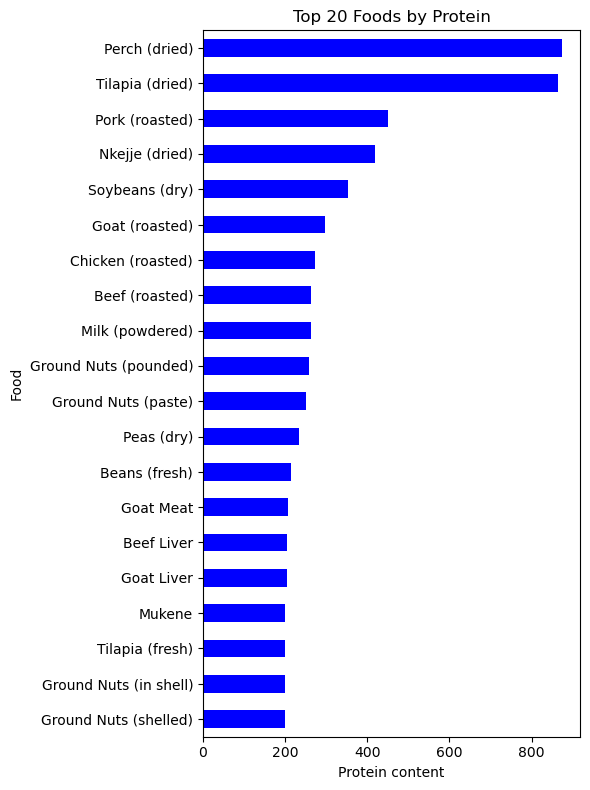

In [100]:

fct_sub = fct[selected_nutrients]

import matplotlib.pyplot as plt

# Suppose fct_sub is a DataFrame of shape (num_foods, num_nutrients).
# Pick a single nutrient, e.g., "Protein".
nutrient = "Protein"

# Sort foods by descending nutrient content
fct_sorted = fct_sub[nutrient].dropna().sort_values(ascending=False)

# Possibly select top 20
fct_top20 = fct_sorted.head(20)

# Horizontal bar plot
plt.figure(figsize=(6, 8))
fct_top20.plot.barh(color="blue")
plt.gca().invert_yaxis()  # highest at top
plt.title(f"Top 20 Foods by {nutrient}")
plt.xlabel(f"{nutrient} content")
plt.ylabel("Food")
plt.tight_layout()
plt.show()



#  **[B] Nutritional adequacy of diet** 

In [101]:
z = z[rdi.columns.tolist()]

hh_rdi = z@rdi.T

# Uganda data is per week, so make this a recommended WEEKLY intake:
hh_rwi = hh_rdi*7

In [102]:
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,0.592589,0.599713,0.570837,0.730620,0.345795,1.009359,0.604887,0.582842,0.751250,0.828903,0.435536,0.457073,1.019780,2.074016,0.544675
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,0.813048,0.953952,0.736230,1.018190,0.536423,1.173403,0.877983,0.843816,1.016623,1.198399,0.579181,0.808951,1.611713,2.767033,0.833017
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,0.611068,0.725415,0.553551,0.767144,0.353159,0.910906,0.676749,0.629888,0.766849,0.908671,0.445948,0.612691,1.209593,2.082522,0.592292
1013000201,2019-20,Central,5.896034,4.875425,4.586574,3.981770,2.245100,9.245175,7.561930,4.549573,5.188904,6.726254,2.905651,4.312132,7.173296,10.319433,4.460910
1013000202,2019-20,Central,0.865439,1.085972,0.673721,0.830387,0.307091,1.023703,0.816847,0.812191,1.031330,1.183650,0.531315,0.983719,1.468082,2.070012,0.806613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,0.577613,0.665980,0.578513,0.804301,0.336218,0.871675,0.652015,0.591753,0.747719,0.825984,0.410693,0.540452,1.130855,2.502262,0.536822
c33f6cb57d9849949e08a7350dabb829,2019-20,Central,3.059777,2.625927,2.370183,2.123488,1.152660,4.473188,3.922200,2.342099,2.799828,3.411503,1.573139,2.537659,3.701922,5.159009,2.422137
d10a687889de469687377204195f3db0,2019-20,Western,0.699187,0.748952,0.690121,0.778277,0.305725,1.497831,1.051588,0.737218,0.836289,1.029041,0.424614,0.777651,1.269372,1.568205,0.602260


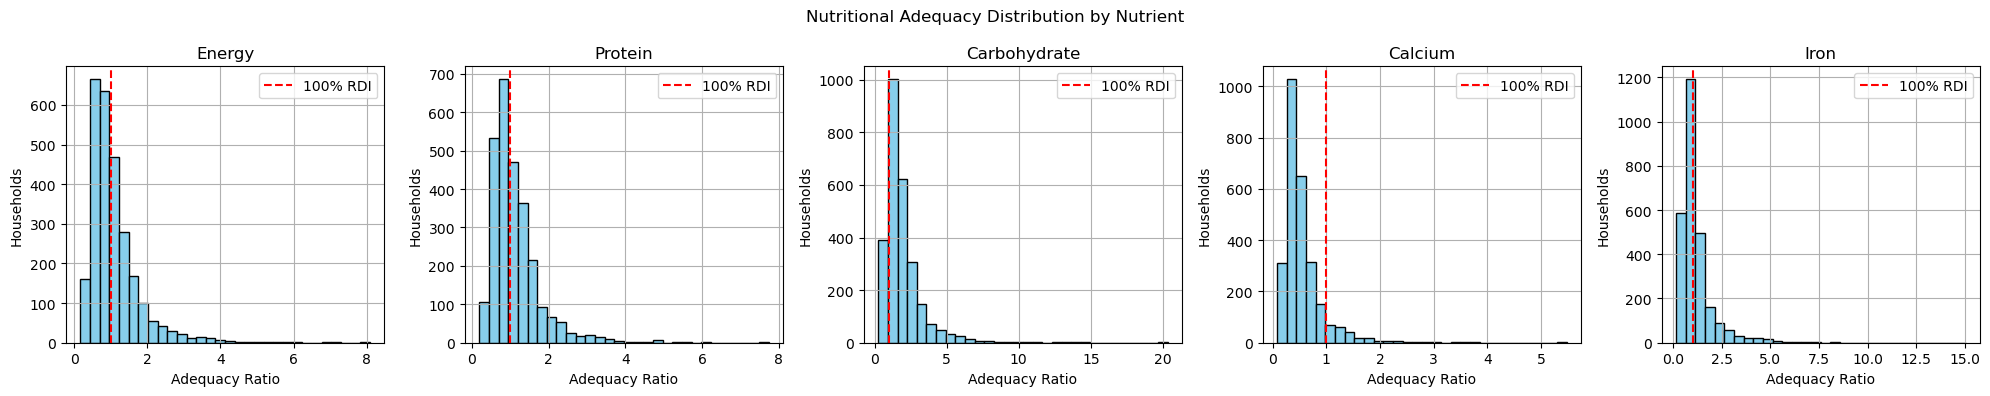

In [103]:
import matplotlib.pyplot as plt

nutrients_to_plot = ['Energy', 'Protein', 'Carbohydrate', 'Calcium', 'Iron']

fig, axes = plt.subplots(nrows=1, ncols=len(nutrients_to_plot), figsize=(20, 4))

for ax, nutrient in zip(axes, nutrients_to_plot):
    nutrient_ratio[nutrient].hist(ax=ax, bins=30, color='skyblue', edgecolor='black')
    ax.axvline(1, color='red', linestyle='--', label='100% RDI')
    ax.set_title(nutrient)
    ax.set_xlabel('Adequacy Ratio')
    ax.set_ylabel('Households')
    ax.legend()

plt.suptitle('Nutritional Adequacy Distribution by Nutrient')
plt.tight_layout()
plt.show()


In [104]:
adequacy_summary = {}

for nutrient in nutrients_to_plot:
    series = nutrient_ratio[nutrient].dropna()
    adequate = (series >= 1).mean()  # proportion meeting or exceeding RDI
    inadequate = 1 - adequate
    adequacy_summary[nutrient] = {
        'Above RDI': round(adequate * 100, 1),
        'Below RDI': round(inadequate * 100, 1)
    }

import pandas as pd
pd.DataFrame(adequacy_summary).T


,Above RDI,Below RDI
Energy,42.3,57.7
Protein,46.8,53.2
Carbohydrate,80.7,19.3
Calcium,8.7,91.3
Iron,44.0,56.0


Based on household-level food consumption data, we computed nutrient adequacy ratios by dividing weekly nutrient intake by recommended dietary intake (RDI).

For Energy, Protein, and Carbohydrates, the majority of households fall below the RDI threshold, with especially large shortfalls in Calcium and Iron — both essential for long-term health.

# **[A] Estimate Demand System**

In [67]:
def process_data_per_year(uganda_data, year):
    """
    Processes the Uganda dataset for a given year.
    
    Parameters:
      uganda_data: The key or identifier for your Sheets data.
      year: The time period to filter by (e.g., "2013-14").
    
    Returns:
      x: DataFrame of processed food expenditures.
      p: DataFrame of processed food prices (only for goods with expenditures).
      y: DataFrame of the log of expenditures.
      d: DataFrame of household characteristics for the selected year.
    """
    # --- Food Expenditures ---
    sheet_expend = f"Food Expenditures ({year})"
    x = read_sheets(uganda_data, sheet=sheet_expend)
    x = x.set_index(['i', 't', 'm', 'j']).squeeze()
    
    # --- Food Prices ---
    sheet_prices = f"Food Prices ({year})"
    p = read_sheets(uganda_data, sheet=sheet_prices).set_index(['t', 'm', 'j', 'u'])
    p = p.groupby(['t', 'm', 'j', 'u']).median()
    
    # Inspect available unit values
    available_units = p.index.get_level_values('u').unique()
    #print("Available unit values:", available_units)
    
    # Try to select prices with unit 'kg'
    try:
        p = p.xs('Kg', level="u").squeeze().unstack('j')
    except KeyError:
        # If 'kg' is not available, either adjust the unit or handle it differently:
        raise KeyError(f"'kg' not found in unit levels. Available units: {available_units}")
    
    p = p[x.index.levels[-1]].T

    # --- Household Characteristics ---
    d = read_sheets(uganda_data, sheet="Household Characteristics")
    d = d[d.t == year]
    d.columns.name = 'k'
    d = d.replace(np.nan, 0)
    
    # --- Expenditures Processing ---
    x = x.T.groupby(['i', 't', 'm', 'j']).sum()
    x = x.replace(0, np.nan)
    y = np.log(x)
    
    # --- Set index for household characteristics ---
    d.set_index(['i', 't', 'm'], inplace=True)
    
    return x, y, d

# --------------------------------------------
# CHANGE YEAR (2013-14 or 2019-20) and Run Cell
#---------------------------------------------
x, y, d = process_data_per_year(uganda_data,"2019-20")

print("Food Expenditures (x)")
display(x.head())

print("Household Characteristics (d)")
display(d.head())

print("Log of Expenditures (y)")
display(y.head())

Food Expenditures (x)


i                                 t        m         j              
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Beans (dry)        12000
                                                     Beef               28000
                                                     Beer                9600
                                                     Cabbage (green)     1000
                                                     Cassava (fresh)     4000
Name: Expenditure, dtype: int64

Household Characteristics (d)


,,k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.609438
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.098612
00246782f8654441a9df0f6ec0b6fc9f,2019-20,Northern,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.791759
003ed8d32f794609919d60d2ed8813e8,2019-20,Eastern,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.386294
005fbc5779014a0290b088071bde9f72,2019-20,Central,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Log of Expenditures (y)


i                                 t        m         j              
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Beans (dry)         9.392662
                                                     Beef               10.239960
                                                     Beer                9.169518
                                                     Cabbage (green)     6.907755
                                                     Cassava (fresh)     8.294050
Name: Expenditure, dtype: float64

In [68]:
result.predicted_expenditures()

i                                 t        m         j                     
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Avocado                    1836.603231
                                                     Beans (dry)                8530.391173
                                                     Beans (fresh)              4828.283261
                                                     Beef                      15788.755164
                                                     Bogoya                     4770.257706
                                                                                   ...     
ffec87c6ae87498f956723afe69266b9  2019-20  Eastern   Sweet Potatoes (fresh)     8625.903421
                                                     Tea (leaves)                218.108367
                                                     Tomatoes                   1543.016198
                                                     Waragi                     4677.821554
    

In [69]:
yhat = result.get_predicted_log_expenditures()
print("Shape of y:", y.shape)
print("Index of y:", y.index.names)
print("Number of y entries:", len(y))

print("Shape of yhat:", yhat.shape)
print("Index of yhat:", yhat.index.names)
print("Number of yhat entries:", len(yhat))

Shape of y: (46453,)
Index of y: ['i', 't', 'm', 'j']
Number of y entries: 46453
Shape of yhat: (93400,)
Index of yhat: ['i', 't', 'm', 'j']
Number of yhat entries: 93400


In [70]:
from cfe import Regression

result = Regression(y=y,d=d)

/tmp/ipykernel_1647/2927765956.py:34: UserWarning: Glyph 119910 (\N{MATHEMATICAL ITALIC SMALL Y}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 119910 (\N{MATHEMATICAL ITALIC SMALL Y}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


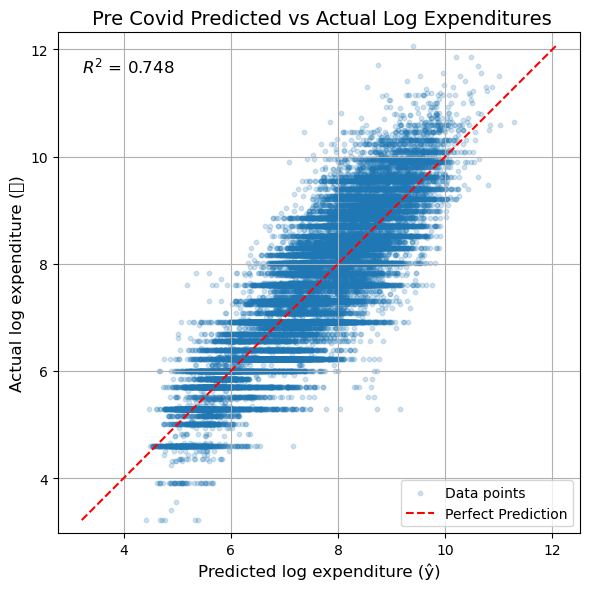

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})

# Drop any NaNs
df = df.dropna()


# Basic scatter
plt.figure(figsize=(6, 6))
plt.scatter(df['yhat'], df['y'], alpha=0.2, s=10, label="Data points")

# 45-degree line
lims = [
    np.min([df.y.min(), df.yhat.min()]),
    np.max([df.y.max(), df.yhat.max()]),
]
plt.plot(lims, lims, 'r--', label='Perfect Prediction')

# R^2
r2 = r2_score(df['y'], df['yhat'])
plt.text(lims[0], lims[1] - 0.5, f"$R^2$ = {r2:.3f}", fontsize=12)

# Labels and formatting
plt.title(" Pre Covid Predicted vs Actual Log Expenditures", fontsize=14)
plt.xlabel("Predicted log expenditure (ŷ)", fontsize=12)
plt.ylabel("Actual log expenditure (𝑦)", fontsize=12)
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Parameters

##### (Relative) Income Elasticity


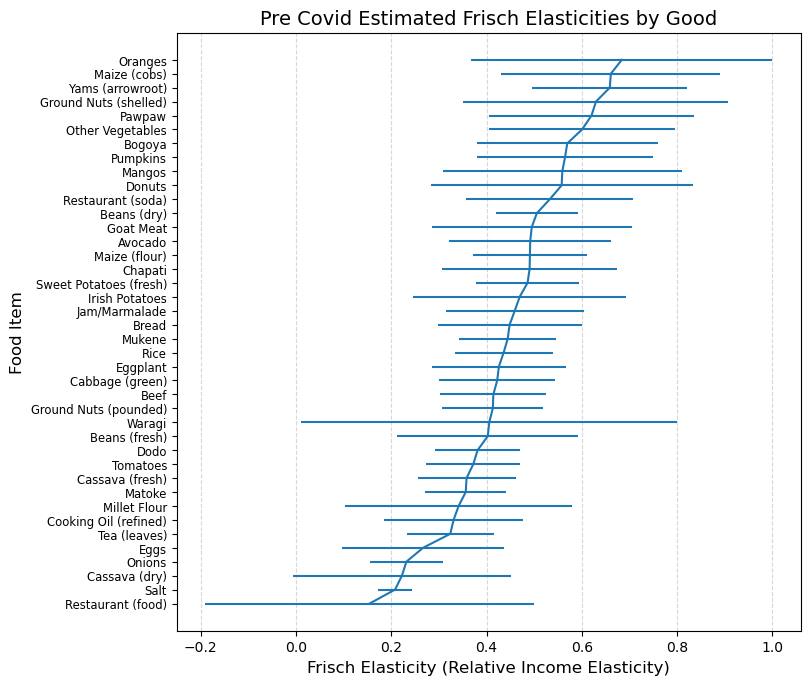

In [72]:
fig = result.graph_beta()
ax = fig.axes[0]  # get the first (and probably only) Axes object

# Now you can safely call axis methods:
ax.set_title("Pre Covid Estimated Frisch Elasticities by Good", fontsize=14)
ax.set_xlabel("Frisch Elasticity (Relative Income Elasticity)", fontsize=12)
ax.set_ylabel("Food Item", fontsize=12)
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

In [73]:
result.get_beta()

j
Avocado                   0.491605
Beans (dry)               0.505585
Beans (fresh)             0.402485
Beef                      0.414268
Bogoya                    0.569319
Bread                     0.448379
Cabbage (green)           0.422295
Cassava (dry)             0.222406
Cassava (fresh)           0.358005
Chapati                   0.490357
Cooking Oil (refined)     0.330803
Dodo                      0.381159
Donuts                    0.557596
Eggplant                  0.425859
Eggs                      0.266904
Goat Meat                 0.494841
Ground Nuts (pounded)     0.413128
Ground Nuts (shelled)     0.629584
Irish Potatoes            0.469540
Jam/Marmalade             0.459178
Maize (cobs)              0.660815
Maize (flour)             0.490957
Mangos                    0.558918
Matoke                    0.356349
Millet Flour              0.341413
Mukene                    0.444387
Onions                    0.231682
Oranges                   0.683867
Other Vegetables  

In [74]:
result.get_gamma()

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Constant
j,,,,,,,,,,,,,,,,
Avocado,-0.075130,-0.096756,0.084182,-0.020909,-0.067245,0.052538,0.142329,-0.009031,-0.102307,-0.004225,-0.023604,-0.048174,0.184218,0.141886,0.359116,7.295330
Beans (dry),-0.119205,-0.011679,0.016457,-0.032303,-0.006493,0.021725,0.090761,-0.078460,0.013432,0.025968,0.045490,0.060823,0.002167,0.093750,0.509117,8.344383
Beans (fresh),-0.135883,-0.009350,0.182532,0.058728,-0.052626,0.059083,0.056270,0.040204,-0.064929,0.073651,-0.046357,-0.089039,-0.129506,0.070576,0.435945,8.290561
Beef,-0.124955,0.030874,0.036872,0.011101,0.085192,0.105158,0.231804,-0.006167,0.042996,0.026783,0.041476,0.078713,0.199303,0.158738,0.115244,9.278204
Bogoya,-0.079815,-0.111142,0.036841,-0.175985,0.118642,0.108468,0.245149,0.145858,0.037278,0.059983,-0.009456,0.007480,0.014867,0.220527,0.420928,7.730244
Bread,-0.013796,0.037677,-0.042708,0.025537,0.042576,0.070712,0.116402,-0.048262,0.068566,0.029174,0.024188,0.060000,0.182989,0.114190,0.198986,8.298821
Cabbage (green),-0.007169,-0.056088,0.045229,0.028790,-0.012902,0.040766,0.054226,-0.035323,0.011107,0.022596,0.046213,0.081324,0.020000,0.039899,0.203232,7.049881
Cassava (dry),-0.037626,0.004953,-0.000825,0.037702,-0.017457,0.095118,0.100100,0.010373,0.054489,0.178974,0.192838,0.067130,-0.024498,0.038514,0.309090,8.375994
Cassava (fresh),0.027196,0.065150,0.128347,0.003786,0.029914,0.018645,0.163190,-0.000794,0.116971,0.139972,0.128480,0.030488,0.004316,0.094468,0.206271,8.142775


##### Welfare


<Axes: ylabel='Density'>

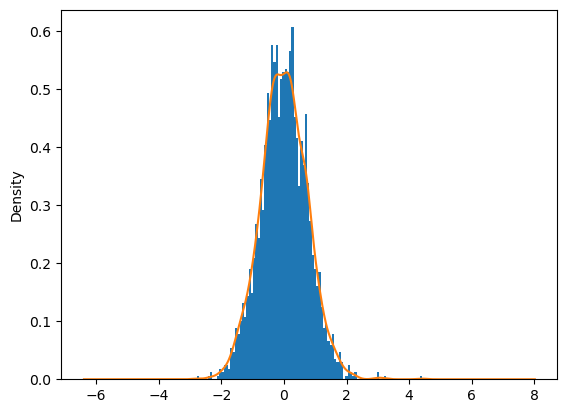

In [75]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

#### Saving Result

In [76]:
result.to_pickle('uganda_estimates.rgsn')

In [77]:
import cfe
result = cfe.regression.read_pickle('uganda_estimates.rgsn')


#### Demand and Utility


##### Budgets


In [78]:
xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

##### Reference Prices


In [79]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
common_goods = pbar.index.intersection(result.beta.index)
pbar = pbar.loc[common_goods].fillna(1)
#pbar = p.mean(axis=0)
pbar = pbar.reindex(result.beta.index, fill_value=1)
 # Only use prices for goods we can estimate

# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar = pbar.replace(np.nan,1)

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,j,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [80]:
# 1) Average prices by rows => Series indexed by food names
pbar = p.mean(axis=0)

# 2) Debug: Check indices
print("pbar index:", pbar.index)
print("beta index:", result.beta.index)

# 3) Align
common_goods = pbar.index.intersection(result.beta.index)
print("Missing in prices:", set(result.beta.index) - set(common_goods))

pbar = pbar.loc[common_goods].fillna(1)

def my_prices(p0, j, p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p


pbar index: Index(['Beans', 'Beef', 'Beer', 'Biscuits', 'Bongo', 'Bread', 'Butter, etc.',
       'Cabbages', 'Cake', 'Cassava', 'Cassava (flour)', 'Chapati', 'Cheese',
       'Chicken', 'Cigarettes', 'Coffee', 'Cooking Oil', 'Cornflakes', 'Dodo',
       'Donut', 'Eggs', 'Fish (dried)', 'Fish (fresh)', 'Garlic', 'Ghee',
       'Ginger', 'Goat', 'Ground Nuts', 'Honey', 'Ice Cream', 'Infant Formula',
       'Irish Potatoes', 'Jackfruit', 'Jam/Marmalade', 'Kabalagala',
       'Macaroni/Spaghetti', 'Maize', 'Mangos', 'Matoke', 'Milk (fresh)',
       'Milk (powdered)', 'Millet', 'Onions', 'Oranges', 'Other Alcohol',
       'Other Drinks', 'Other Fruits', 'Other Juice', 'Other Meat',
       'Other Spices', 'Other Tobacco', 'Other Veg.', 'Passion Fruits', 'Peas',
       'Plantains', 'Pork', 'Rice', 'Salt', 'Samosa', 'Sim Sim', 'Soda',
       'Sorghum', 'Soybean', 'Sugar', 'Sugarcane', 'Sweet Bananas',
       'Sweet Potatoes', 'Tea', 'Tomatoes', 'Waragi', 'Water', 'Wheat (flour)',
       'Yam',

In [81]:
common_goods = pbar.index.intersection(result.beta.index)
print("Final goods in pbar:", len(common_goods))
print("Expected goods in result:", len(result.beta.index))

Final goods in pbar: 15
Expected goods in result: 40


In [82]:
common_goods = pbar.index.intersection(result.beta.index)
print("Final goods in pbar:", len(common_goods))
print("Expected goods in result:", len(result.beta.index))

missing = set(result.beta.index) - set(common_goods)
print("Missing goods:", missing)

Final goods in pbar: 15
Expected goods in result: 40
Missing goods: {'Avocado', 'Beans (dry)', 'Maize (cobs)', 'Sweet Potatoes (fresh)', 'Goat Meat', 'Beans (fresh)', 'Other Vegetables', 'Cassava (fresh)', 'Cooking Oil (refined)', 'Yams (arrowroot)', 'Restaurant (food)', 'Bogoya', 'Ground Nuts (pounded)', 'Restaurant (soda)', 'Tea (leaves)', 'Ground Nuts (shelled)', 'Pawpaw', 'Mukene', 'Cassava (dry)', 'Pumpkins', 'Millet Flour', 'Donuts', 'Cabbage (green)', 'Maize (flour)', 'Eggplant'}


##### Demand as a function of prices


Text(0.5, 0, 'Quantities of Beef Demanded')

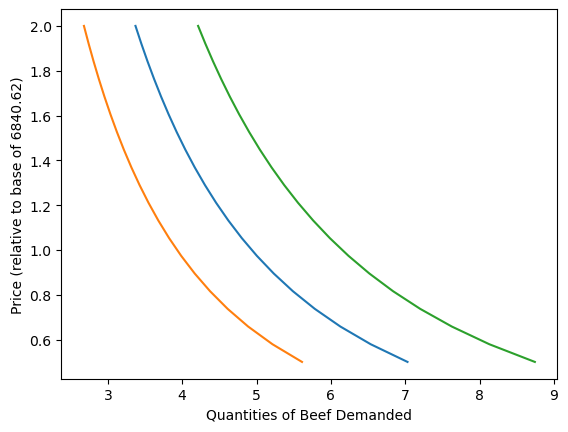

In [83]:
# Ensure pbar is aligned and complete
pbar = pbar.reindex(result.beta.index, fill_value=1)

use = 'Beef'
scale = np.linspace(.5, 2, 20)

# Helper function to safely compute demands
def get_demand(x, good, scale_factor):
    p_scaled = my_prices(pbar[good] * scale_factor, good, pbar)
    demand = result.demands(x, p_scaled)
    return demand[good]

plt.plot([get_demand(xref, use, s) for s in scale], scale)
plt.plot([get_demand(xbar.quantile(0.25), use, s) for s in scale], scale)
plt.plot([get_demand(xbar.quantile(0.75), use, s) for s in scale], scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")


Text(0.5, 0, 'Quantities of Beef Demanded')

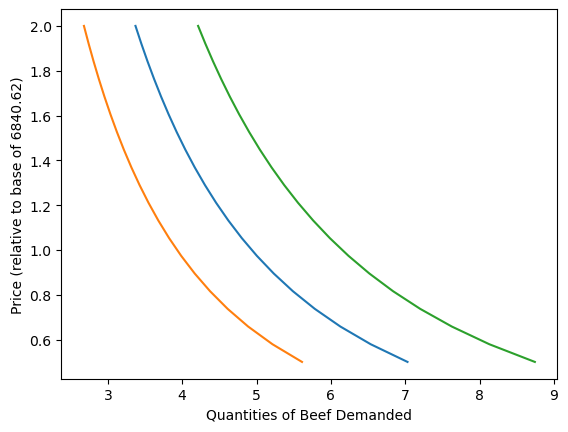

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

use = 'Beef'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Millet for household at median budget
plt.plot([result.demands(xref,my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

##### Engel Curves


Text(0.5, 1.0, 'Engel Curves')

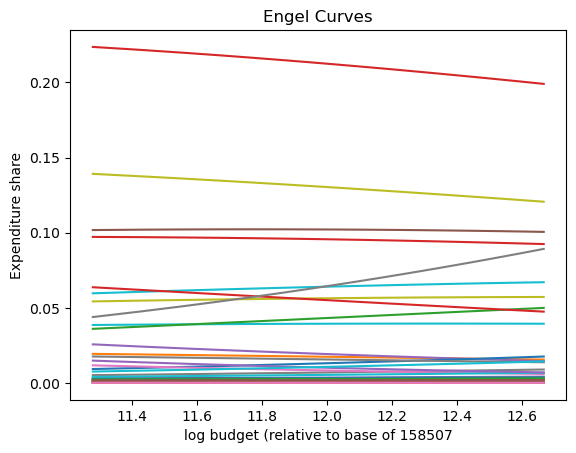

In [85]:
fig,ax = plt.subplots()

ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f}')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

##### Indirect Utility


Text(0.5, 1.0, 'Indirect Utility Function')

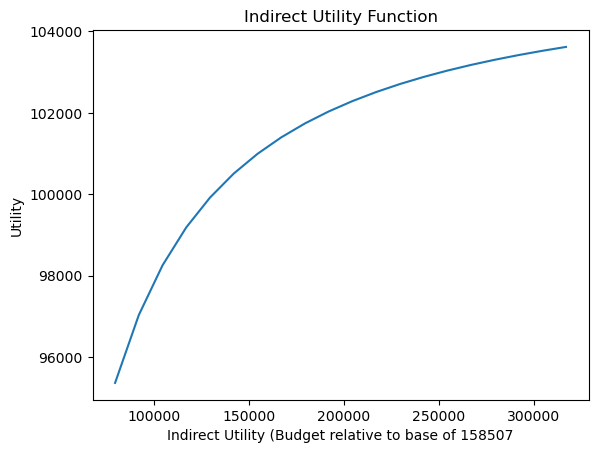

In [86]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')

# [C] Counterfactual Experiments

In [ ]:
print("y_2 type:", type(x_2.stack()))
print("z_2 type:", type(z_2))
print("y_2 index names:", x_2.stack().index.names)
print("z_2 index names:", z_2.index.names)

In [ ]:
import cfe

result = cfe.Regression(y=np.log(x_2.stack()),d=z_2)

result.get_beta().sort_values(ascending=False)
